In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import statistics



In [0]:
Existing_Employee = pd.read_csv("/content/existing_employee.csv")
EL= pd.read_csv("/content/employee_who_left (2).csv")


In [7]:
Existing_Employee.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [8]:
EL.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


DATA PREPROCESSING

This step entails preparation of the data for analysis

SALARY COUNT FOR BOTH EMPLOYEES WHO LEFT AND EXISTING EMPLOYEES

In [9]:
EL.salary.value_counts()

low       2172
medium    1317
high        82
Name: salary, dtype: int64

In [10]:
Existing_Employee.salary.value_counts()

low       5144
medium    5129
high      1155
Name: salary, dtype: int64

WORK ACCIDENT COUNT FOR BOTH EMPLOYEES WHO LEFT AND EXISTING


In [11]:
EL['Work_accident'] = EL.Work_accident.replace(to_replace =1, 
                 value ="Yes") 
EL['Work_accident'] = EL.Work_accident.replace(to_replace =0, 
                 value ="No")
EL.Work_accident.value_counts()

No     3402
Yes     169
Name: Work_accident, dtype: int64

In [12]:
Existing_Employee['Working_accident'] = Existing_Employee.Work_accident.replace(to_replace =1,
                                  value = 'Yes')
Existing_Employee['Working_accident'] = Existing_Employee.Work_accident.replace(to_replace =0,
                                   value = 'No')
Existing_Employee.Work_accident.value_counts() 



0    9428
1    2000
Name: Work_accident, dtype: int64

PROMOTION COUNT FOR THE LAST 5YEARS FOR BOTH EMPLOYEES WHO LEFT AND EXISTING

In [13]:
EL['promotion_last_5years'] = EL.promotion_last_5years.replace(to_replace =1, 
                 value ="Yes") 
EL['promotion_last_5years'] = EL.promotion_last_5years.replace(to_replace =0, 
                 value ="No")
EL.promotion_last_5years.value_counts()

No     3552
Yes      19
Name: promotion_last_5years, dtype: int64

In [14]:
Existing_Employee['promotion_last_5years'] = Existing_Employee.promotion_last_5years.replace(to_replace =1,
                                  value = 'Yes')
Existing_Employee['promotion_last_5years'] = Existing_Employee.promotion_last_5years.replace(to_replace =0,
                                   value = 'No')
Existing_Employee.promotion_last_5years.value_counts()

No     11128
Yes      300
Name: promotion_last_5years, dtype: int64


UNIVARIATE ANALYSIS FOR BOTH EMPLOYEES WHO LEFT AND EXISTING EMPLOYEES

**SALARY PLOT**

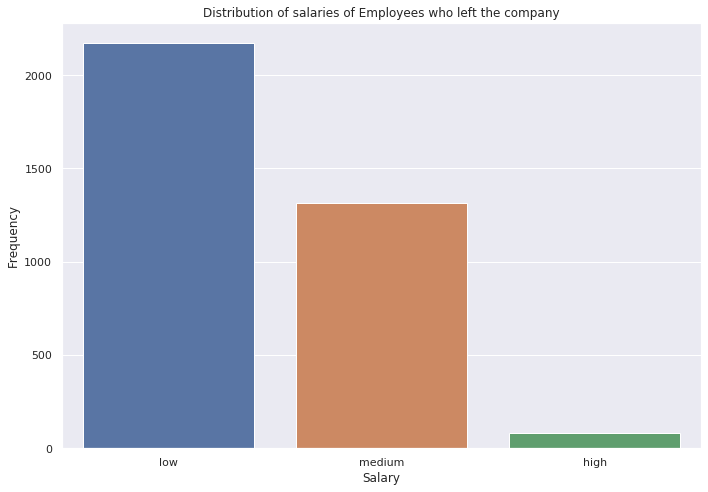

In [15]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.countplot(EL['salary'])
plt.title('Distribution of salaries of Employees who left the company')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.tight_layout()



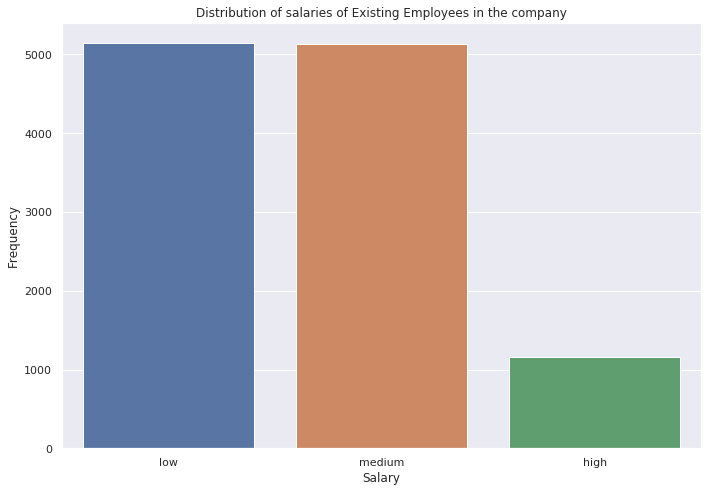

In [16]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.countplot(Existing_Employee['salary'])
plt.title('Distribution of salaries of Existing Employees in the company')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.tight_layout()



**DEPARTMENT BAR PLOT**

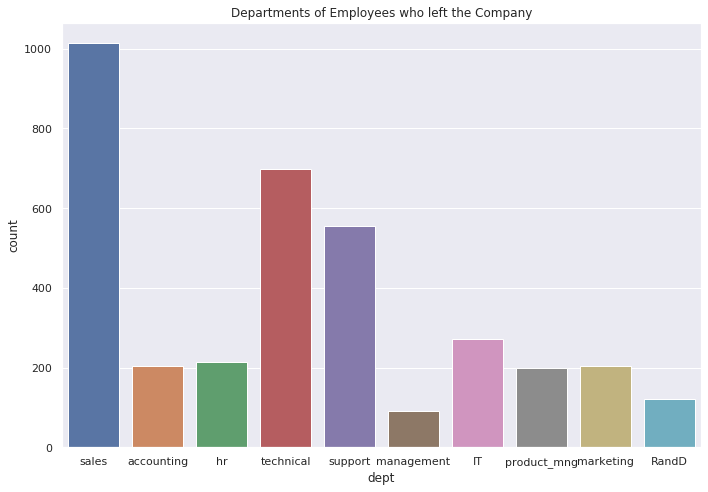

In [17]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.countplot(EL['dept'])
plt.title('Departments of Employees who left the Company')
plt.tight_layout()


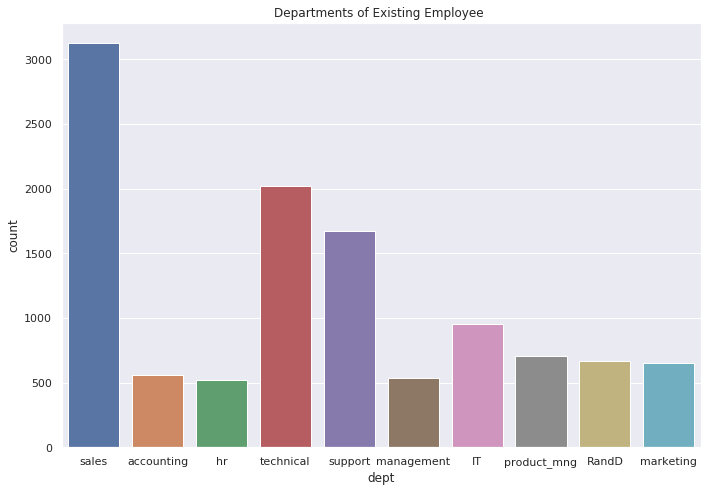

In [18]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.countplot(Existing_Employee['dept'])
plt.title('Departments of Existing Employee ')
plt.tight_layout()


**SATISFACTION LEVEL**

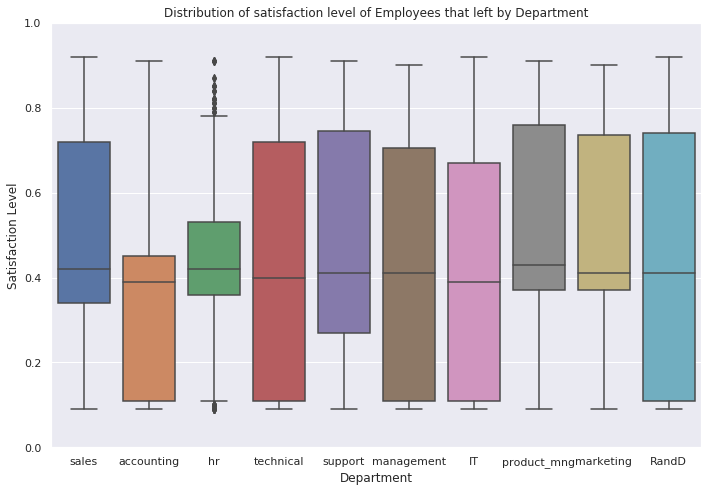

In [47]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.boxplot(x='dept', y='satisfaction_level', data=EL)
plt.ylim([0,1])
plt.title('Distribution of satisfaction level of Employees that left by Department')
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')
plt.tight_layout()


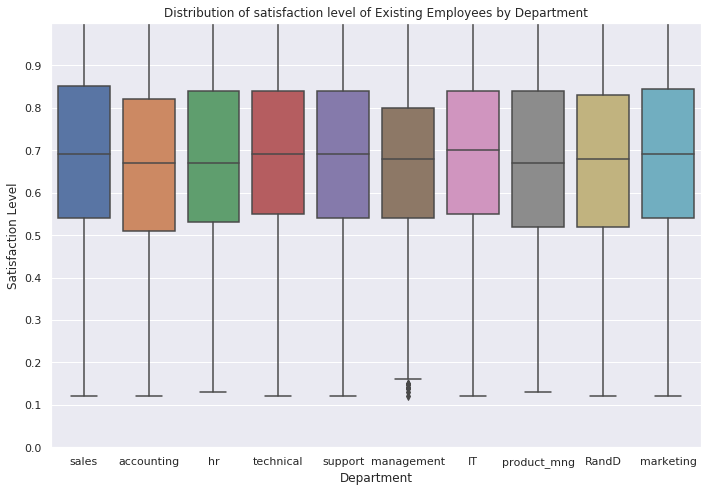

In [48]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.boxplot(x='dept', y='satisfaction_level', data=Existing_Employee)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Distribution of satisfaction level of Existing Employees by Department')
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')
plt.tight_layout()


From the box plot of both Existing employees and employees who left the company, the following insights have been discovered 

1.   The mean satisfaction level of employees who left the company ranges bewteen 40-50% 
2.   The mean satisfaction level of existing employees in  the company ranges between 60-70%

Performing further analysis on the satisfaction level of both employees who left and existing employees in the company for better insight 


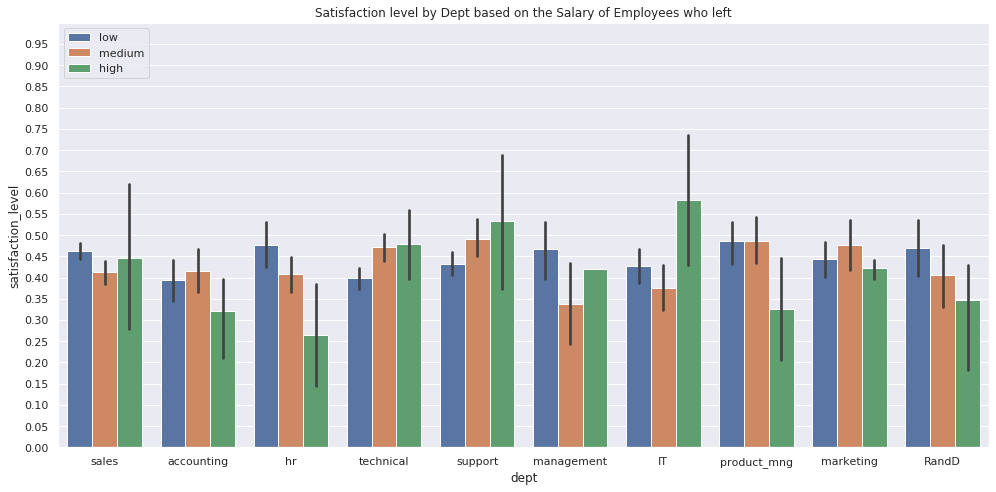

In [21]:
plt.figure(figsize=(14,7))
sns.set(style='darkgrid')
sns.barplot(x='dept', y='satisfaction_level', hue='salary', data = EL)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.title('Satisfaction level by Dept based on the Salary of Employees who left')
plt.tight_layout()
plt.legend(loc=2)

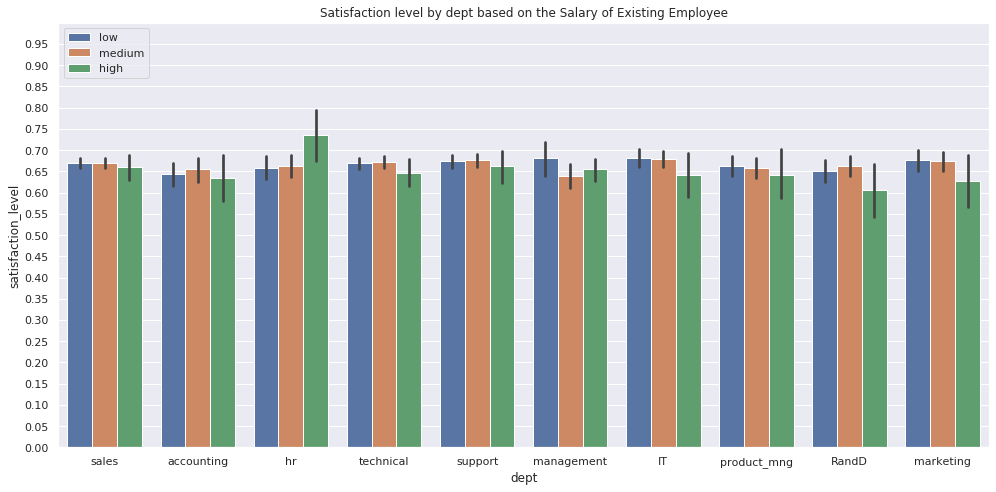

In [22]:
plt.figure(figsize=(14,7))
sns.set(style='darkgrid')
sns.barplot(x='dept',y='satisfaction_level',hue='salary',data= Existing_Employee)
plt.title('Satisfaction level by dept based on the Salary of Existing Employee')
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()
plt.legend(loc=2)

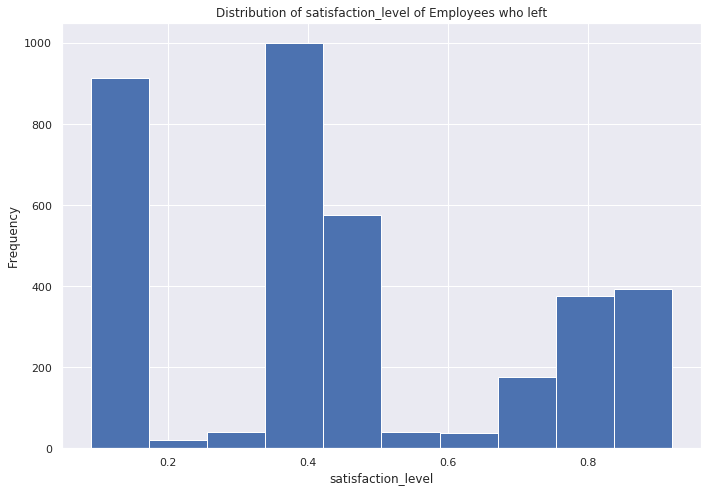

In [23]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
plt.hist(EL['satisfaction_level'])
plt.title('Distribution of satisfaction_level of Employees who left')
plt.xlabel('satisfaction_level')
plt.ylabel('Frequency')
plt.tight_layout()


In [0]:
EL['satisfaction_level2'] = pd.cut(EL['satisfaction_level'], 
       3, labels=["small", "medium", "high"])

In [25]:
EL.satisfaction_level2.value_counts()

medium    1536
small     1078
high       957
Name: satisfaction_level2, dtype: int64

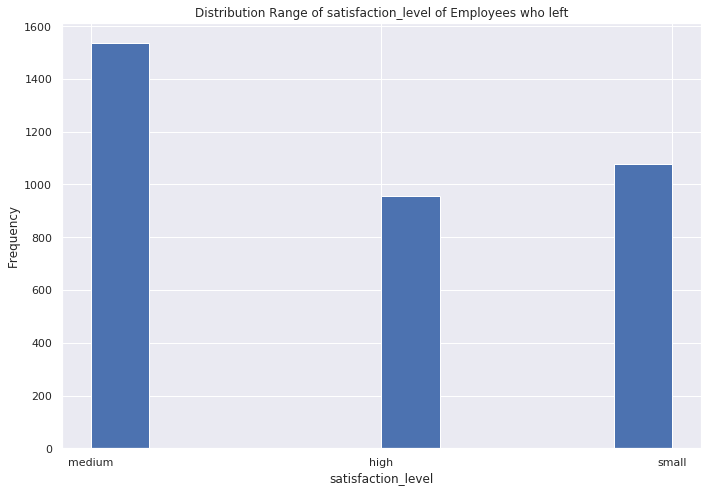

In [26]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
plt.hist(EL['satisfaction_level2'])
plt.title('Distribution Range of satisfaction_level of Employees who left')
plt.xlabel('satisfaction_level')
plt.ylabel('Frequency')
plt.tight_layout()

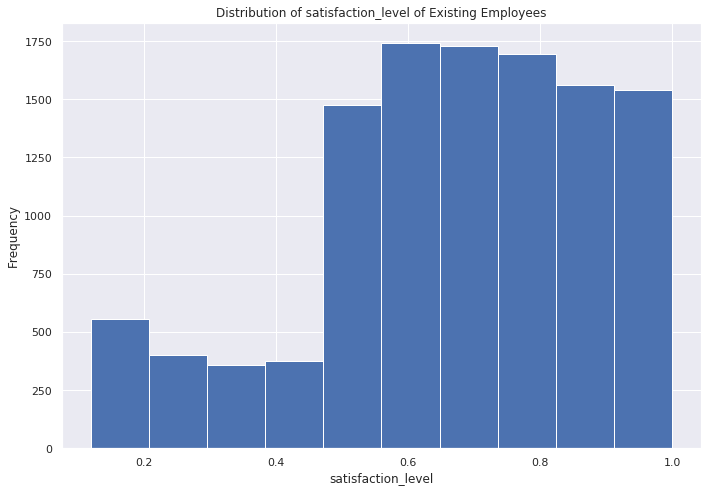

In [27]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
plt.hist(Existing_Employee['satisfaction_level'])
plt.title('Distribution of satisfaction_level of Existing Employees')
plt.xlabel('satisfaction_level')
plt.ylabel('Frequency')
plt.tight_layout()

In [0]:
Existing_Employee['satisfaction_level2'] = pd.cut(Existing_Employee['satisfaction_level'], 
       3, labels=["small", "medium", "high"])

In [29]:
Existing_Employee.satisfaction_level2.value_counts()

high      5365
medium    4635
small     1428
Name: satisfaction_level2, dtype: int64

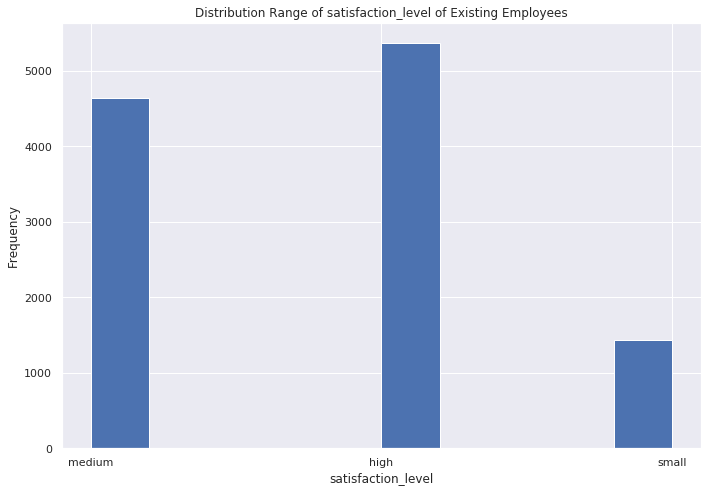

In [30]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
plt.hist(Existing_Employee['satisfaction_level2'])
plt.title('Distribution Range of satisfaction_level of Existing Employees')
plt.xlabel('satisfaction_level')
plt.ylabel('Frequency')
plt.tight_layout()

From the satisfaction level chart plots of employees who left the company, it is observed that the satisfaction level is below average, therefore it is vital to show the percentage of employees who left that are in this category 

DETERMINING THE PERCENTAGE OF EMPLOYEES WHO LEFT THE COMPANY HAD A SATISFACTION LEVEL BELOW AVERAGE OF 45

In [31]:
(len(EL[EL['satisfaction_level']<0.45])/len(EL)) * 100

64.57574908989079

From the output generated it can be observed that an estimate of 65% of employees who left had a satisfaction level below average of 45%.
This needs to be looked into as it's a determining factor as to why employees left the company.
Futher insights needs to be carried out as to why the satisfaction level is low.
Promotion status, salary where two factors that was considered by intuition which prompted further analysis to determine the percenatge of employees who left having a satisfaction level of 45%, their promotion status and salary range

In [33]:
(EL[EL['satisfaction_level']<0.45] ['salary'].value_counts(normalize=True))*100

low       60.754553
medium    37.120555
high       2.124892
Name: salary, dtype: float64

From the output displayed, it can be seen that an estimate of 61% of employees who left where low income earners, 37% where medium income earners and 2% where high income earners.

In [34]:
(EL[EL['satisfaction_level']<0.45] ['promotion_last_5years'].value_counts(normalize=True))*100

No     99.566349
Yes     0.433651
Name: promotion_last_5years, dtype: float64

From the output displayed, it can be seen that 99.6% of employees who left had a satisfaction level less than 45% and where not promoted in the last five years

Through the insights gained from the employees who left, it is vital to validate the position of the existing employees in the company.

DETERMINING THE MEAN SATISFACTION LEVEL OF EXISTING EMPLOYEES

In [35]:
statistics.mean(Existing_Employee['satisfaction_level'])*100

66.6809590479524

From the output it is seen that the average satisfaction level of existing employees is estimated around 67%. Hence using the metrics/determing factor of employees who left as an insight to crosscheck existing employees who are prone to leave the company considering their promotion status

In [36]:
(len(Existing_Employee[Existing_Employee['satisfaction_level']<0.45])/len(EL)) * 100

44.21730607672921

In [37]:
(Existing_Employee[Existing_Employee['satisfaction_level']<0.45] ['promotion_last_5years'].value_counts(normalize=True))*100

No     97.720076
Yes     2.279924
Name: promotion_last_5years, dtype: float64

From the result displayed it shows 44% of existing employees have a satisfaction level below 45% and from this it is seen that an estimate of 98% have not been promoted in the last 5 years

BI/MULTIVARIATE ANALYSIS

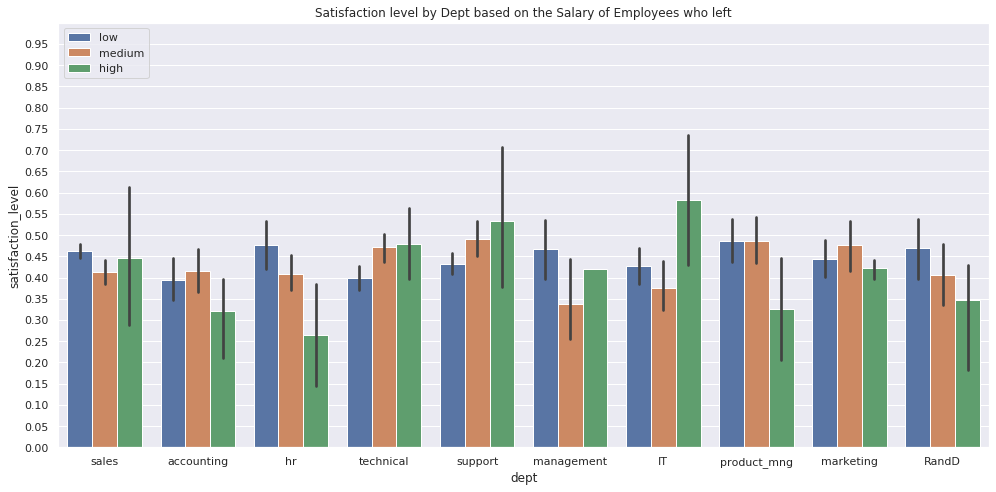

In [0]:
plt.figure(figsize=(14,7))
sns.set(style='darkgrid')
sns.barplot(x='dept', y='satisfaction_level', hue='salary', data = EL)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.title('Satisfaction level by Dept based on the Salary of Employees who left')
plt.tight_layout()
plt.legend(loc=2)


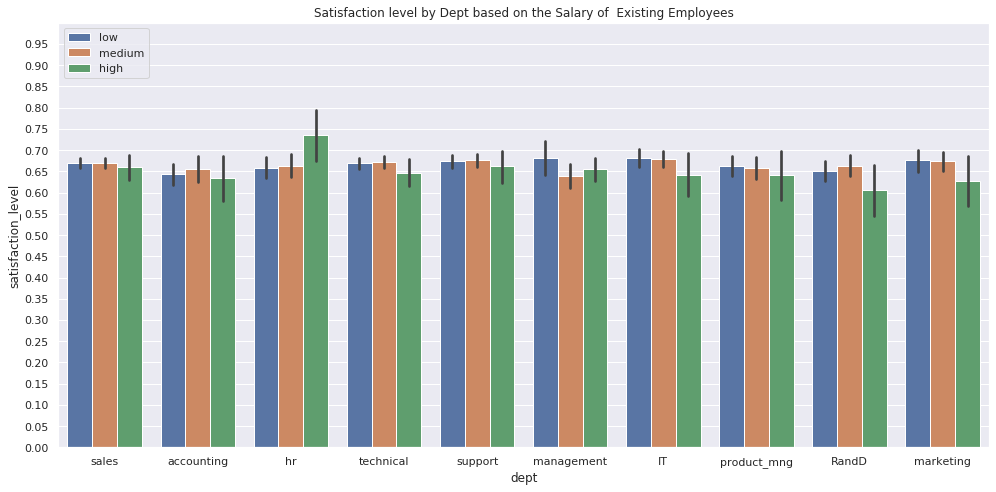

In [46]:
plt.figure(figsize=(14,7))
sns.set(style='darkgrid')
sns.barplot(x='dept', y='satisfaction_level', hue='salary', data = Existing_Employee)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.title('Satisfaction level by Dept based on the Salary of  Existing Employees')
plt.tight_layout()
plt.legend(loc=2)

Text(0, 0.5, 'Satisfaction Level')

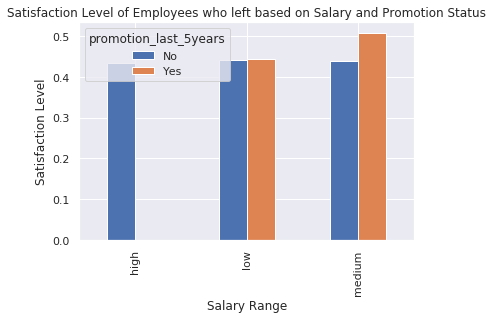

In [38]:
EL_PRO =EL.pivot_table(index='salary',columns='promotion_last_5years',values='satisfaction_level')
EL_PRO.plot.bar()
plt.title("Satisfaction Level of Employees who left based on Salary and Promotion Status")
plt.xlabel("Salary Range")
plt.ylabel("Satisfaction Level")

Insight: Most employees who left with a high salary range weren't promoted,regardless of other employee who were promoted that had their salary range from low to medium, it futher can be seen that the satisfaction level was below average of 45% and the employees who left where not promoted irrespective of their salary income. 
Hence Satisfaction level and promotion status are determining factors as to why employees are leaving the company.

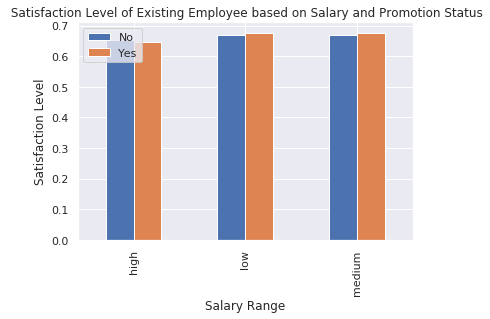

In [39]:
Existing_Employee_PRO =Existing_Employee.pivot_table(index='salary',columns='promotion_last_5years',values='satisfaction_level')
Existing_Employee_PRO.plot.bar()
plt.title(" Satisfaction Level of Existing Employee based on Salary and Promotion Status")
plt.xlabel("Salary Range")
plt.ylabel("Satisfaction Level")
plt.legend(loc=2)

The insight obtained from this ouput for employees still existing in the company is such that salary is not a determining  factor as to why the existing employees should leave the company due to the fact that the employees satisfaction level is above an average of 50% irrespective of their promotion status.

Text(0, 0.5, 'Satisfaction Level')

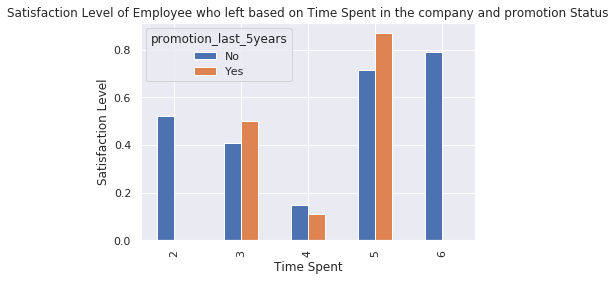

In [40]:
EL_PRO =EL.pivot_table(index='time_spend_company',columns='promotion_last_5years',values='satisfaction_level')
EL_PRO.plot.bar()
plt.title("Satisfaction Level of Employee who left based on Time Spent in the company and promotion Status")
plt.xlabel("Time Spent")
plt.ylabel("Satisfaction Level")

From output above the insight: Time Spent and promotion status are great factors that determine if an employee should leave or not, some employee who left that spent 6 years in the company weren't promoted, even though their satisfaction level was quite moderate.
It can also be seen that An avaerge employee who left spent about 4 years with 0.45 satisfaction level and wasn't promoted. 

Recommedation: 

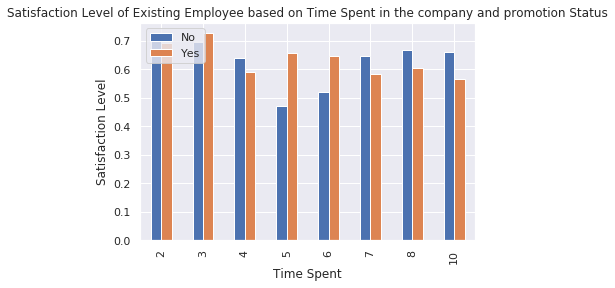

In [41]:
Existing_Employee_PRO =Existing_Employee.pivot_table(index='time_spend_company',columns='promotion_last_5years',values='satisfaction_level')
Existing_Employee_PRO.plot.bar()
plt.title("Satisfaction Level of Existing Employee based on Time Spent in the company and promotion Status")
plt.xlabel("Time Spent")
plt.ylabel("Satisfaction Level")
plt.legend(loc=2)

From the output the insight obtained is such that the existing employees in company irrespective of the time spent have a moderate satisfaction level and positive promotion  status above 0.5 exculding employeees that spent between 5 years in the company.
Hence satisfaction level of employees that spent 5 years should is considered as a determining factor and why such employees are prone to leave.

Text(0, 0.5, 'Satisfaction Level')

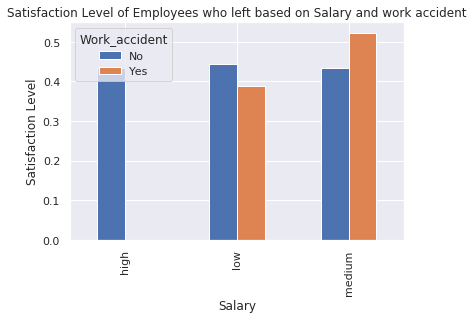

In [42]:
EL_PRO =EL.pivot_table(index='salary',columns='Work_accident',values='satisfaction_level')
EL_PRO.plot.bar()
plt.title("Satisfaction Level of Employees who left based on Salary and work accident")
plt.xlabel("Salary")
plt.ylabel("Satisfaction Level")

From the output the insight obtained is such that employees who left that earn between low and medium salaries where affected by work accidents and their satisfaction level was below avaerage of 0.45 as compared to those with a high salary.
Hence work accident and satisfaction level are reasons as to why employees are leaving the company.

Text(0, 0.5, 'Satisfaction Level')

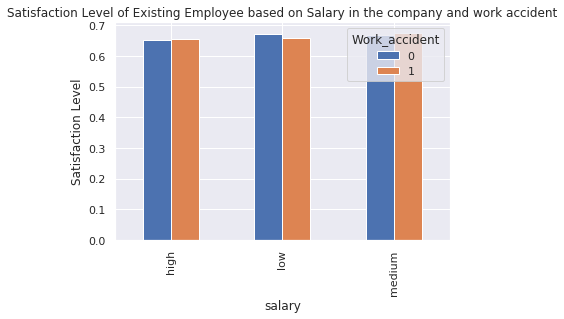

In [43]:
Existing_Employee_PRO =Existing_Employee.pivot_table(index='salary',columns='Work_accident',values='satisfaction_level')
Existing_Employee_PRO.plot.bar()
plt.title("Satisfaction Level of Existing Employee based on Salary in the company and work accident")
plt.xlabel("salary")
plt.ylabel("Satisfaction Level")

Text(0, 0.5, 'Satisfaction Level')

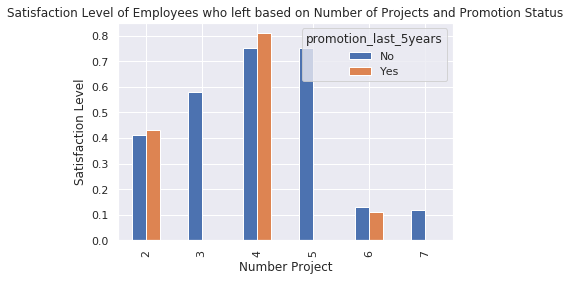

In [44]:
EL_PRO =EL.pivot_table(index='number_project',columns='promotion_last_5years',values='satisfaction_level')
EL_PRO.plot.bar()
plt.title("Satisfaction Level of Employees who left based on Number of Projects and Promotion Status")
plt.xlabel("Number Project")
plt.ylabel("Satisfaction Level")

From the output displayed, the insight gotten it can be seen that as the number of projects embarked on by employees who left exceeded 4, the satisfaction level began to decline and they where not promoted in the last five years.
Hence an increase in the number of projects resulting in a decline in satisfaction level and employee promotion status can be seen as reasons as to why employees are leaving the company.

Text(0, 0.5, 'Satisfaction Level')

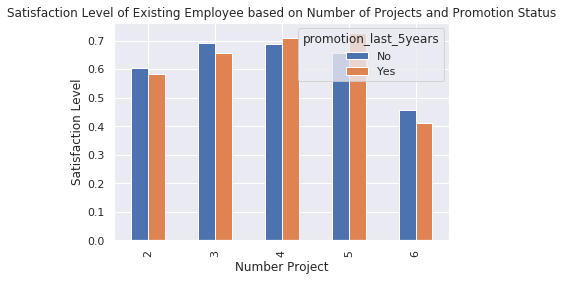

In [45]:
Existing_Employee_PRO =Existing_Employee.pivot_table(index='number_project',columns='promotion_last_5years',values='satisfaction_level')
Existing_Employee_PRO.plot.bar()
plt.title("Satisfaction Level of Existing Employee based on Number of Projects and Promotion Status")
plt.xlabel("Number Project")
plt.ylabel("Satisfaction Level")

From the output displayed, the insight gotten it can be seen that as the number of projects embarked on by employees still in the company exceeded 4, the satisfaction level began to decline and they where not promoted in the last five years, this can also be seen as a trend for employees who left.
Hence an increase in the number of projects resulting in a decline in satisfaction level and employee promotion status can be seen as reasons as to which exsiting employees are prone to leave the company.